<a href="https://colab.research.google.com/github/jeremiahzhao/StageCHamoye/blob/main/Machine_Learning_Stage_C_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [ ]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [ ]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


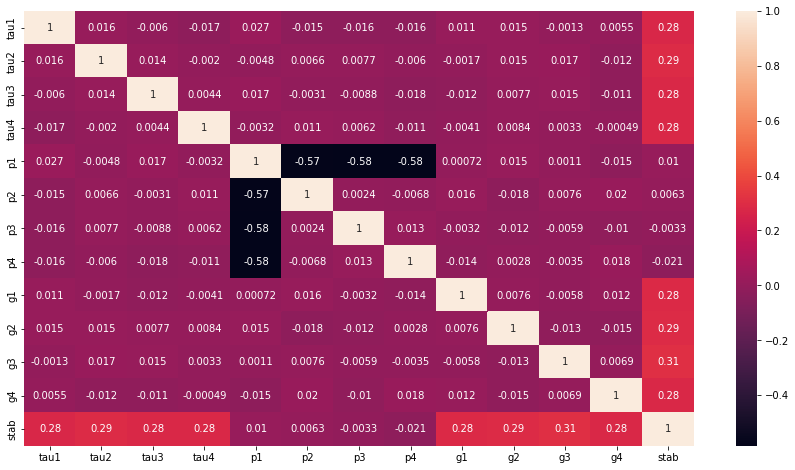

In [ ]:
CorrMatrix = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(CorrMatrix, annot = True)


In [ ]:
df = df.drop(columns = 'stab')
X = df.drop(columns = 'stabf')
y = df['stabf']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 1)
randomforest.fit(X_train_scaled, y_train)

randomforest_pred = rf_clf.predict(X_test_scaled)

In [ ]:
#classification report on random forest classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, randomforest_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9176    0.8764    0.8966       712
    unstable     0.9333    0.9565    0.9448      1288

    accuracy                         0.9280      2000
   macro avg     0.9255    0.9165    0.9207      2000
weighted avg     0.9277    0.9280    0.9276      2000



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extratrees = ExtraTreesClassifier(random_state = 1)
extratrees.fit(X_train_scaled, y_train)

extratrees_pred = extratrees.predict(X_test_scaled)

In [ ]:
#classification report on extra trees classifier
print(classification_report(y_test, extratrees_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9406    0.8455    0.8905       712
    unstable     0.9191    0.9705    0.9441      1288

    accuracy                         0.9260      2000
   macro avg     0.9299    0.9080    0.9173      2000
weighted avg     0.9268    0.9260    0.9250      2000



In [ ]:
from xgboost import XGBRFClassifier

extreme = XGBRFClassifier(random_state = 1)
extreme.fit(X_train_scaled, y_train)

extreme_pred = extreme.predict(X_test_scaled)

In [ ]:
#classification report on XG Boost classifier
print(classification_report(y_test, extreme_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.8404    0.5843    0.6893       712
    unstable     0.8033    0.9387    0.8657      1288

    accuracy                         0.8125      2000
   macro avg     0.8219    0.7615    0.7775      2000
weighted avg     0.8165    0.8125    0.8029      2000



In [ ]:
from lightgbm import LGBMClassifier

light = LGBMClassifier(random_state = 1)
light.fit(X_train_scaled, y_train)

light_pred = light.predict(X_test_scaled)

In [ ]:
#classification report on Light GBM classifier
print(classification_report(y_test, light_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9243    0.8919    0.9078       712
    unstable     0.9414    0.9596    0.9504      1288

    accuracy                         0.9355      2000
   macro avg     0.9328    0.9257    0.9291      2000
weighted avg     0.9353    0.9355    0.9352      2000

